PREDICTING SENTIMENT SCORE BY ANALYZING SOCIAL MEDIA ENGAGEMENT DATASET WITH 12000 ROWS AND 28 COLUMNS

This project focuses on analyzing social media engagement data to build a model that predicts sentiment scores using a Decision Tree Classifier. The goal is to understand the relationship between various social media metrics and the sentiment expressed in user content. By applying the Decision Tree algorithm, we aim to classify sentiment into categories such as negative, neutral, and positive, providing insights into how social media engagement correlates with user opinions and feelings. This model will predict the sentiment score of the person on the basis of text content and topics on the social media.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.svm import SVR
from sklearn.impute import SimpleImputer
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
import os
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix



In [ ]:
df = pd.read_csv('/content/Social Media Engagement Dataset (1).csv')

In [ ]:
df

,post_id,timestamp,day_of_week,platform,user_id,location,language,text_content,hashtags,mentions,...,comments_count,impressions,engagement_rate,brand_name,product_name,campaign_name,campaign_phase,user_past_sentiment_avg,user_engagement_growth,buzz_change_rate
0,kcqbs6hxybia,2024-12-09 11:26:15,Monday,Instagram,user_52nwb0a6,"Melbourne, Australia",pt,Just tried the Chromebook from Google. Best pu...,#Food,NaN,...,701,18991,0.19319,Google,Chromebook,BlackFriday,Launch,0.0953,-0.3672,19.1
1,vkmervg4ioos,2024-07-28 19:59:26,Sunday,Twitter,user_ucryct98,"Tokyo, Japan",ru,Just saw an ad for Microsoft Surface Laptop du...,"#MustHave, #Food","@CustomerService, @BrandCEO",...,359,52764,0.05086,Microsoft,Surface Laptop,PowerRelease,Post-Launch,0.1369,-0.4510,-42.6
2,memhx4o1x6yu,2024-11-23 14:00:12,Saturday,Reddit,user_7rrev126,"Beijing, China",ru,What's your opinion about Nike's Epic React? ...,"#Promo, #Food, #Trending",NaN,...,643,8887,0.45425,Nike,Epic React,BlackFriday,Post-Launch,0.2855,-0.4112,17.4
3,bhyo6piijqt9,2024-09-16 04:35:25,Monday,YouTube,user_4mxuq0ax,"Lagos, Nigeria",en,Bummed out with my new Diet Pepsi from Pepsi! ...,"#Reviews, #Sustainable","@StyleGuide, @BrandSupport",...,743,6696,0.42293,Pepsi,Diet Pepsi,LaunchWave,Launch,-0.2094,-0.0167,-5.5
4,c9dkiomowakt,2024-09-05 21:03:01,Thursday,Twitter,user_l1vpox2k,"Berlin, Germany",hi,Just tried the Corolla from Toyota. Absolutely...,"#Health, #Travel","@BrandSupport, @InfluencerName",...,703,47315,0.08773,Toyota,Corolla,LocalTouchpoints,Launch,0.6867,0.0807,38.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7310,gn9gnl4zw1n7,2024-09-14 05:22:44,Saturday,Reddit,user_lo0o4vmh,"Rio de Janeiro, Brazil",hi,Comparing Toyota Sienna to the competition. Di...,#Sustainable,"@RetailSupport, @ReviewSite",...,500,25022,0.03872,Toyota,Sienna,ValentinesDeals,Pre-Launch,-0.9369,-0.0154,69.6
7311,gv0kvgyuvb97,2024-07-08 21:09:53,Monday,YouTube,user_hp7siejv,"Dubai, UAE",ar,My one month review of Pepsi Crystal Pepsi: Do...,"#ProductLaunch, #Eco",NaN,...,29,56166,0.05985,Pepsi,Crystal Pepsi,BlackFriday,Post-Launch,0.1598,-0.0574,89.4
7312,nk4w5cojxan6,2024-08-11 23:29:30,Sunday,Facebook,user_mzdo1snl,"Dubai, UAE",ja,Has anyone else experienced battery problems w...,"#MustHave, #Deal, #Travel",NaN,...,814,66892,0.01795,Apple,Mac Mini,SpringBlast2025,Pre-Launch,-0.9686,0.0989,-61.7
7313,l8tq067mvsr6,2025-03-28 03:55:54,Friday,Reddit,user_gvvmqc31,"Milan, Italy",ru,Any advice about Google's Pixel 8? #SpecialOf...,"#SpecialOffer, #TrendAlert, #Food",NaN,...,447,68012,0.07378,Google,Pixel 8,LaunchWave,Pre-Launch,0.5825,-0.4220,66.9


In [ ]:
df.head()

,post_id,timestamp,day_of_week,platform,user_id,location,language,text_content,hashtags,mentions,...,comments_count,impressions,engagement_rate,brand_name,product_name,campaign_name,campaign_phase,user_past_sentiment_avg,user_engagement_growth,buzz_change_rate
0,kcqbs6hxybia,2024-12-09 11:26:15,Monday,Instagram,user_52nwb0a6,"Melbourne, Australia",pt,Just tried the Chromebook from Google. Best pu...,#Food,NaN,...,701,18991,0.19319,Google,Chromebook,BlackFriday,Launch,0.0953,-0.3672,19.1
1,vkmervg4ioos,2024-07-28 19:59:26,Sunday,Twitter,user_ucryct98,"Tokyo, Japan",ru,Just saw an ad for Microsoft Surface Laptop du...,"#MustHave, #Food","@CustomerService, @BrandCEO",...,359,52764,0.05086,Microsoft,Surface Laptop,PowerRelease,Post-Launch,0.1369,-0.4510,-42.6
2,memhx4o1x6yu,2024-11-23 14:00:12,Saturday,Reddit,user_7rrev126,"Beijing, China",ru,What's your opinion about Nike's Epic React? ...,"#Promo, #Food, #Trending",NaN,...,643,8887,0.45425,Nike,Epic React,BlackFriday,Post-Launch,0.2855,-0.4112,17.4
3,bhyo6piijqt9,2024-09-16 04:35:25,Monday,YouTube,user_4mxuq0ax,"Lagos, Nigeria",en,Bummed out with my new Diet Pepsi from Pepsi! ...,"#Reviews, #Sustainable","@StyleGuide, @BrandSupport",...,743,6696,0.42293,Pepsi,Diet Pepsi,LaunchWave,Launch,-0.2094,-0.0167,-5.5
4,c9dkiomowakt,2024-09-05 21:03:01,Thursday,Twitter,user_l1vpox2k,"Berlin, Germany",hi,Just tried the Corolla from Toyota. Absolutely...,"#Health, #Travel","@BrandSupport, @InfluencerName",...,703,47315,0.08773,Toyota,Corolla,LocalTouchpoints,Launch,0.6867,0.0807,38.8


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sentiment_score,7315.0,0.007583,0.583706,-0.99980,-0.50035,0.002700,0.519750,0.99990
toxicity_score,7315.0,0.506310,0.289213,0.00000,0.24955,0.509500,0.761100,0.99990
likes_count,7315.0,2487.222146,1437.329317,0.00000,1241.00000,2471.000000,3718.000000,5000.00000
shares_count,7315.0,1016.238141,575.443449,0.00000,515.00000,1028.000000,1513.500000,2000.00000
comments_count,7315.0,505.632262,289.728995,0.00000,254.00000,503.000000,759.500000,1000.00000
impressions,7315.0,49877.582775,29010.686263,130.00000,24553.50000,49765.000000,74661.500000,99964.00000
engagement_rate,7314.0,0.278246,1.120884,0.00232,0.04921,0.080775,0.165148,32.21171
user_past_sentiment_avg,7314.0,-0.003055,0.578489,-0.99960,-0.50665,-0.004250,0.498300,0.99940
user_engagement_growth,7314.0,0.001102,0.288623,-0.49990,-0.24425,0.003150,0.249675,0.49990
buzz_change_rate,7314.0,0.897142,57.710684,-99.90000,-47.80000,0.600000,50.175000,99.90000


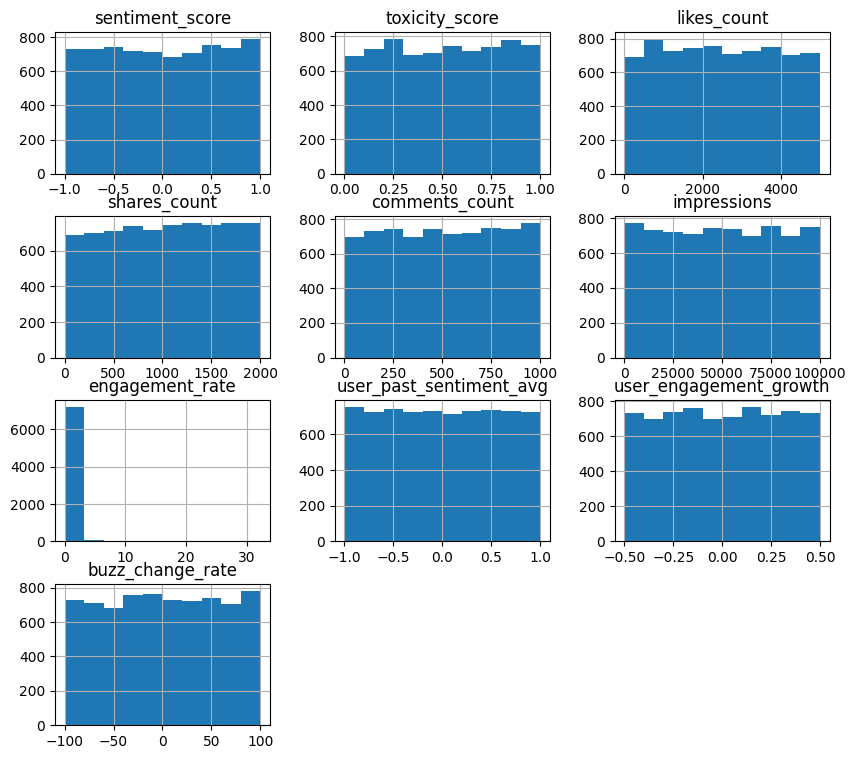

In [ ]:
df.hist(figsize=(10,9))
plt.show()

In [ ]:
print(df.columns)

Index(['post_id', 'timestamp', 'day_of_week', 'platform', 'user_id',
       'location', 'language', 'text_content', 'hashtags', 'mentions',
       'keywords', 'topic_category', 'sentiment_score', 'sentiment_label',
       'emotion_type', 'toxicity_score', 'likes_count', 'shares_count',
       'comments_count', 'impressions', 'engagement_rate', 'brand_name',
       'product_name', 'campaign_name', 'campaign_phase',
       'user_past_sentiment_avg', 'user_engagement_growth',
       'buzz_change_rate'],
      dtype='object')


In [ ]:
df.isnull().sum()

,0
post_id,0
timestamp,0
day_of_week,0
platform,0
user_id,0
location,0
language,0
text_content,0
hashtags,0
mentions,2419


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7315 entries, 0 to 7314
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   post_id                  7315 non-null   object 
 1   timestamp                7315 non-null   object 
 2   day_of_week              7315 non-null   object 
 3   platform                 7315 non-null   object 
 4   user_id                  7315 non-null   object 
 5   location                 7315 non-null   object 
 6   language                 7315 non-null   object 
 7   text_content             7315 non-null   object 
 8   hashtags                 7315 non-null   object 
 9   mentions                 4896 non-null   object 
 10  keywords                 7315 non-null   object 
 11  topic_category           7315 non-null   object 
 12  sentiment_score          7315 non-null   float64
 13  sentiment_label          7315 non-null   object 
 14  emotion_type            

In [ ]:
o = (df.dtypes == 'object')
object_cols = o[o].index
print(f"Categorical Columns : {object_cols}")

Categorical Columns : Index(['post_id', 'timestamp', 'day_of_week', 'platform', 'user_id',
       'location', 'language', 'text_content', 'hashtags', 'mentions',
       'keywords', 'topic_category', 'sentiment_label', 'emotion_type',
       'brand_name', 'product_name', 'campaign_name', 'campaign_phase'],
      dtype='object')


In [ ]:
def unique_cols(df) :
    for i in object_cols:
        print(f"{i} : {df[i].unique()}")

unique_cols(df)

post_id : ['kcqbs6hxybia' 'vkmervg4ioos' 'memhx4o1x6yu' ... 'nk4w5cojxan6'
 'l8tq067mvsr6' 'oigc9r2t8dmj']
timestamp : ['2024-12-09 11:26:15' '2024-07-28 19:59:26' '2024-11-23 14:00:12' ...
 '2024-08-11 23:29:30' '2025-03-28 03:55:54' '2025-02-15 09:31:47']
day_of_week : ['Monday' 'Sunday' 'Saturday' 'Thursday' 'Wednesday' 'Friday' 'Tuesday']
platform : ['Instagram' 'Twitter' 'Reddit' 'YouTube' 'Facebook']
user_id : ['user_52nwb0a6' 'user_ucryct98' 'user_7rrev126' ... 'user_mzdo1snl'
 'user_gvvmqc31' 'user_d3em87l7']
location : ['Melbourne, Australia' 'Tokyo, Japan' 'Beijing, China' 'Lagos, Nigeria'
 'Berlin, Germany' 'Seoul, South Korea' 'Madrid, Spain'
 'São Paulo, Brazil' 'Milan, Italy' 'Houston, USA'
 'Johannesburg, South Africa' 'Mexico City, Mexico' 'Toronto, Canada'
 'Shanghai, China' 'Los Angeles, USA' 'Lyon, France' 'Paris, France'
 'Manchester, UK' 'Dubai, UAE' 'Munich, Germany' 'Osaka, Japan'
 'New York, USA' 'Barcelona, Spain' 'Mumbai, India' 'Chicago, USA'
 'Vancouver, Can

In [ ]:
b = OrdinalEncoder()
df[object_cols] = b.fit_transform(df[object_cols])
df.head().T

,0,1,2,3,4
post_id,4035.00000,6363.00000,4450.00000,2310.00000,2490.00000
timestamp,4449.00000,1751.00000,4114.00000,2722.00000,2509.00000
day_of_week,1.00000,3.00000,2.00000,1.00000,4.00000
platform,1.00000,3.00000,2.00000,4.00000,3.00000
user_id,1014.00000,6179.00000,1564.00000,931.00000,4252.00000
location,15.00000,30.00000,1.00000,9.00000,2.00000
language,7.00000,8.00000,8.00000,2.00000,5.00000
text_content,4144.00000,3740.00000,7256.00000,1215.00000,4190.00000
hashtags,1083.00000,1647.00000,2065.00000,2343.00000,1283.00000
mentions,NaN,61.00000,NaN,182.00000,21.00000


In [ ]:
df.fillna(0, inplace=True)
df.isnull().sum()

,0
post_id,0
timestamp,0
day_of_week,0
platform,0
user_id,0
location,0
language,0
text_content,0
hashtags,0
mentions,0


In [ ]:
df.head().T

,0,1,2,3,4
post_id,4035.00000,6363.00000,4450.00000,2310.00000,2490.00000
timestamp,4449.00000,1751.00000,4114.00000,2722.00000,2509.00000
day_of_week,1.00000,3.00000,2.00000,1.00000,4.00000
platform,1.00000,3.00000,2.00000,4.00000,3.00000
user_id,1014.00000,6179.00000,1564.00000,931.00000,4252.00000
location,15.00000,30.00000,1.00000,9.00000,2.00000
language,7.00000,8.00000,8.00000,2.00000,5.00000
text_content,4144.00000,3740.00000,7256.00000,1215.00000,4190.00000
hashtags,1083.00000,1647.00000,2065.00000,2343.00000,1283.00000
mentions,0.00000,61.00000,0.00000,182.00000,21.00000


In [ ]:
df.columns

Index(['post_id', 'timestamp', 'day_of_week', 'platform', 'user_id',
       'location', 'language', 'text_content', 'hashtags', 'mentions',
       'keywords', 'topic_category', 'sentiment_score', 'sentiment_label',
       'emotion_type', 'toxicity_score', 'likes_count', 'shares_count',
       'comments_count', 'impressions', 'engagement_rate', 'brand_name',
       'product_name', 'campaign_name', 'campaign_phase',
       'user_past_sentiment_avg', 'user_engagement_growth',
       'buzz_change_rate'],
      dtype='object')

In [ ]:
df.dtypes

,0
post_id,float64
timestamp,float64
day_of_week,float64
platform,float64
user_id,float64
location,float64
language,float64
text_content,float64
hashtags,float64
mentions,float64


In [ ]:
 sentiment_score= df.corrwith(df.sentiment_score)
sentiment_score

,0
post_id,-0.003556
timestamp,-0.003779
day_of_week,-0.021009
platform,-0.002585
user_id,0.008269
location,-0.012531
language,0.006192
text_content,0.008588
hashtags,0.013661
mentions,0.018872


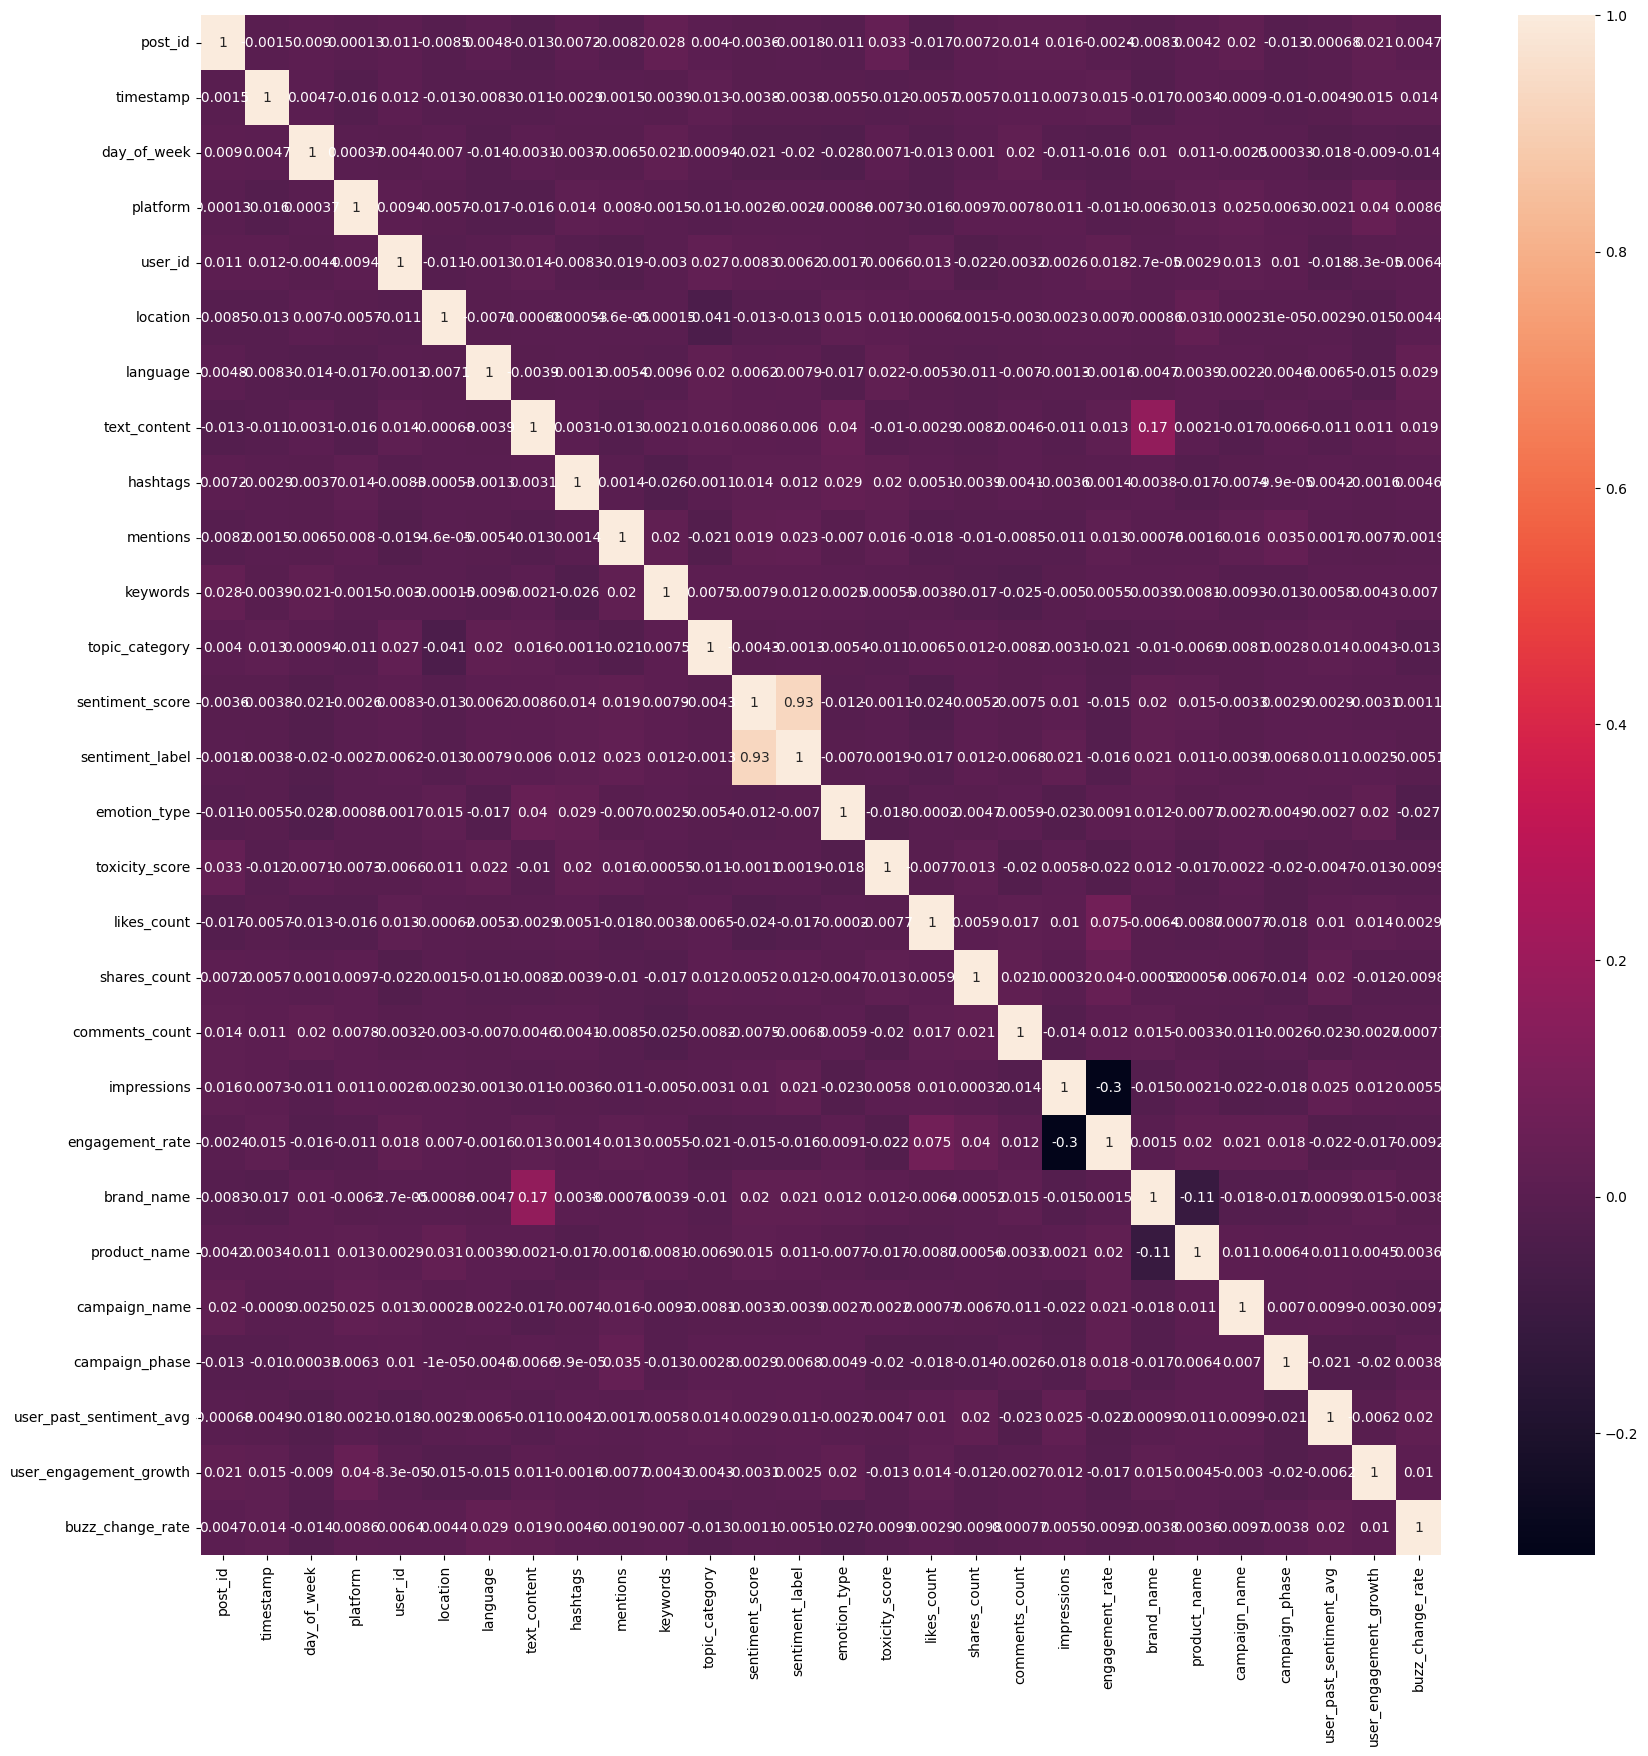

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [ ]:
x = df.drop('sentiment_score', axis=1)
y = df['sentiment_score']

In [ ]:
x

,post_id,timestamp,day_of_week,platform,user_id,location,language,text_content,hashtags,mentions,...,comments_count,impressions,engagement_rate,brand_name,product_name,campaign_name,campaign_phase,user_past_sentiment_avg,user_engagement_growth,buzz_change_rate
0,4035.0,4449.0,1.0,1.0,1014.0,15.0,7.0,4144.0,1083.0,0.0,...,701,18991,0.19319,4.0,6.0,1.0,0.0,0.0953,-0.3672,19.1
1,6363.0,1751.0,3.0,3.0,6179.0,30.0,8.0,3740.0,1647.0,61.0,...,359,52764,0.05086,5.0,57.0,15.0,1.0,0.1369,-0.4510,-42.6
2,4450.0,4114.0,2.0,2.0,1564.0,1.0,8.0,7256.0,2065.0,0.0,...,643,8887,0.45425,6.0,17.0,1.0,1.0,0.2855,-0.4112,17.4
3,2310.0,2722.0,1.0,4.0,931.0,9.0,2.0,1215.0,2343.0,182.0,...,743,6696,0.42293,7.0,13.0,10.0,0.0,-0.2094,-0.0167,-5.5
4,2490.0,2509.0,4.0,3.0,4252.0,2.0,5.0,4190.0,1283.0,21.0,...,703,47315,0.08773,9.0,10.0,11.0,0.0,0.6867,0.0807,38.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7310,3341.0,2680.0,2.0,2.0,4371.0,23.0,5.0,2106.0,2581.0,161.0,...,500,25022,0.03872,9.0,51.0,21.0,2.0,-0.9369,-0.0154,69.6
7311,3384.0,1367.0,1.0,4.0,3588.0,6.0,0.0,5796.0,1943.0,0.0,...,29,56166,0.05985,7.0,11.0,1.0,1.0,0.1598,-0.0574,89.4
7312,4677.0,2013.0,3.0,0.0,4639.0,6.0,6.0,2503.0,1626.0,0.0,...,814,66892,0.01795,2.0,31.0,17.0,2.0,-0.9686,0.0989,-61.7
7313,4211.0,6607.0,0.0,2.0,3428.0,17.0,8.0,241.0,2571.0,0.0,...,447,68012,0.07378,4.0,41.0,10.0,2.0,0.5825,-0.4220,66.9


In [ ]:
y

,sentiment_score
0,0.9826
1,-0.3793
2,-0.3596
3,-0.7282
4,0.5460
...,...
7310,-0.7991
7311,-0.1760
7312,-0.1368
7313,0.2323


In [ ]:
bins = [-1, -0.3, 0.3, 1]
labels = ['negative', 'neutral', 'positive']
y_classified = pd.cut(y, bins=bins, labels=labels)

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y_classified, test_size=0.25, random_state=62)

In [ ]:
dt_model = DecisionTreeClassifier(random_state=62)
dt_model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=62)

In [ ]:
y_pred_dt = dt_model.predict(x_test)
print(confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

[[553  99   0]
 [ 98 378  65]
 [  0  94 542]]
              precision    recall  f1-score   support

    negative       0.85      0.85      0.85       652
     neutral       0.66      0.70      0.68       541
    positive       0.89      0.85      0.87       636

    accuracy                           0.81      1829
   macro avg       0.80      0.80      0.80      1829
weighted avg       0.81      0.81      0.81      1829



In [ ]:
dt_model.score(x_test, y_test)

0.8053581191908147